<a href="https://www.kaggle.com/code/devikasanthosh04/multiple-linear-regression?scriptVersionId=147793391" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers


In [2]:
df =pd.read_csv('/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Let's select some features that we want to use for regression.

In [3]:
cdf=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]
cdf.head(9)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
5,33.871038,12.026925,34.476878,5.493507,637.102448
6,32.021596,11.366348,36.683776,4.685017,521.572175
7,32.739143,12.351959,37.373359,4.434273,549.904146
8,33.987773,13.386235,37.534497,3.273434,570.200409


Creating train and test dataset.

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Visualize the relationship between predictor variables and the target variable in the context of multiple linear regression

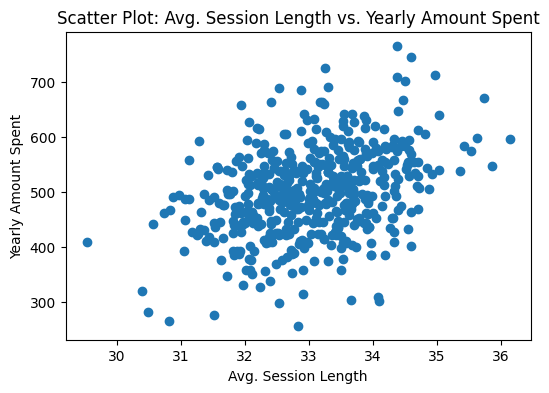

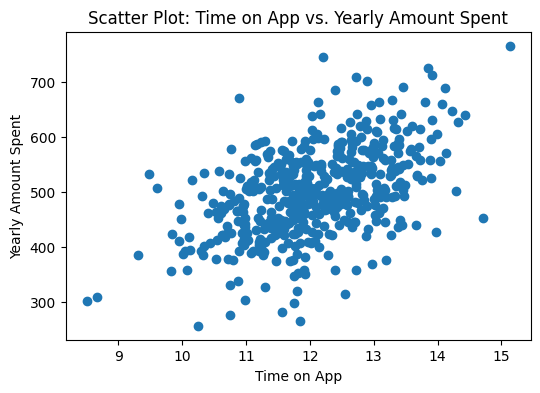

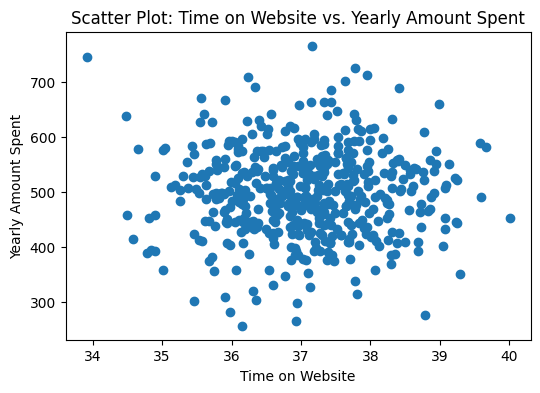

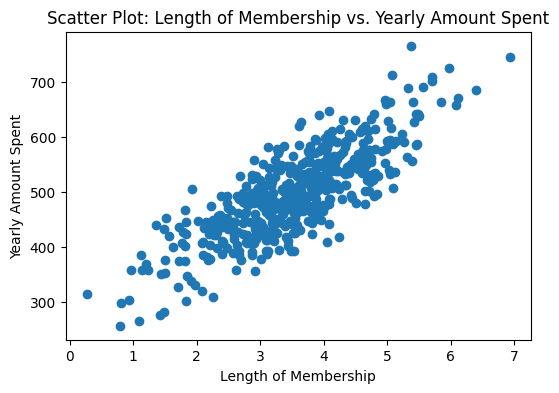

In [5]:
import matplotlib.pyplot as plt

# Assuming 'Yearly Amount Spent' is your target variable
target_variable = 'Yearly Amount Spent'

# Loop through the columns in cdf (excluding the target variable)
for feature in cdf.columns:
    if feature != target_variable:
        plt.figure(figsize=(6, 4))
        plt.scatter(cdf[feature], cdf[target_variable])
        plt.xlabel(feature)
        plt.ylabel(target_variable)
        plt.title(f'Scatter Plot: {feature} vs. {target_variable}')
        plt.show()


# **Multiple Regression Model**
When more than one independent variable is present, the process is called multiple linear regression.

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Avg. Session Length','Time on App','Time on Website','Length of Membership']])
y = np.asanyarray(train[['Yearly Amount Spent']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[25.71219963 38.47613945  0.64161639 61.23115978]]


As mentioned before, Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 4 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

# Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output over all samples in the dataset.

In [7]:
x = np.asanyarray(test[['Avg. Session Length','Time on App','Time on Website','Length of Membership']])
y = np.asanyarray(test[['Yearly Amount Spent']])
y_hat = regr.predict(x)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 90.69
Variance score: 0.99


The low RSS and high R2 score suggest that the model's predictions are accurate and that it explains a significant portion of the variance in the target variable.